# ANALISIS ESTADISTICO DE DATASET : ECOMMERCE CHURN


fuente : [KAGGLE](https://www.kaggle.com/datasets/samuelsemaya/e-commerce-customer-churn)

# PASO 1 : IMPORTAMOS LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# PASO 2 : CARGAMOS DATASET

In [8]:
data_df = pd.read_csv('/content/data_ecommerce_customer_churn.csv')
data_df.head(2)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0


# PASO 3 - ANALISIS EXPLORATORIO DE DATOS(EDA)

## TIPOS DE DATOS

In [3]:
data_df.dtypes

,0
Tenure,float64
WarehouseToHome,float64
NumberOfDeviceRegistered,int64
PreferedOrderCat,object
SatisfactionScore,int64
MaritalStatus,object
NumberOfAddress,int64
Complain,int64
DaySinceLastOrder,float64
CashbackAmount,float64


## CONTEO POR TIPO DE DATOS

In [4]:
data_df.dtypes.value_counts()

,count
int64,5
float64,4
object,2


## TAMAÑO DEL DATASET(FILAS Y COLUMNAS)

In [5]:
data_df.shape

(3941, 11)

# PASO 4 - TRATAMIENTO DE DATOS FALTANTES

## EJECUTAMOS FUNCIONES MISSING

In [7]:
%run '/content/pandas_missing_extension_2.ipynb'

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24815 sha256=2464b5dc25791218121ad94e46938660c71b45aaa2d07073ffa3819452a89658
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


In [37]:
data_df = pd.read_csv('/content/data_ecommerce_customer_churn.csv')
data_df.head(2)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0


In [14]:
data_df.size

43351

In [11]:
data_df.missing.number_complete()

42775

In [12]:
data_df.missing.number_missing()

576

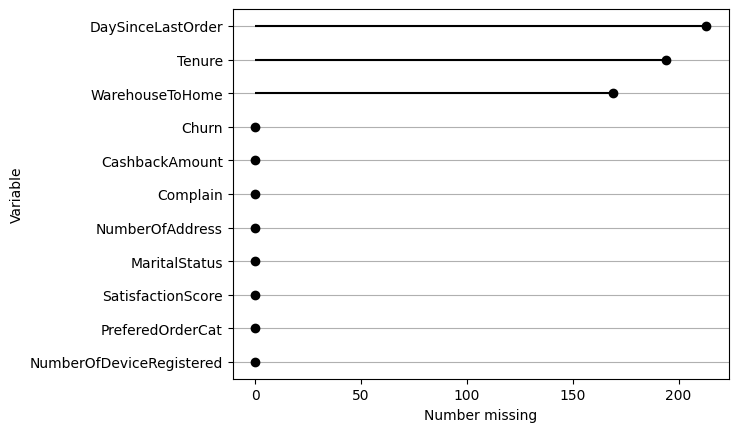

In [15]:
data_df.missing.missing_variable_plot()

## CLASIFICAMOS EL TIPO DE FALTANTES

In [16]:
import missingno

<Axes: >

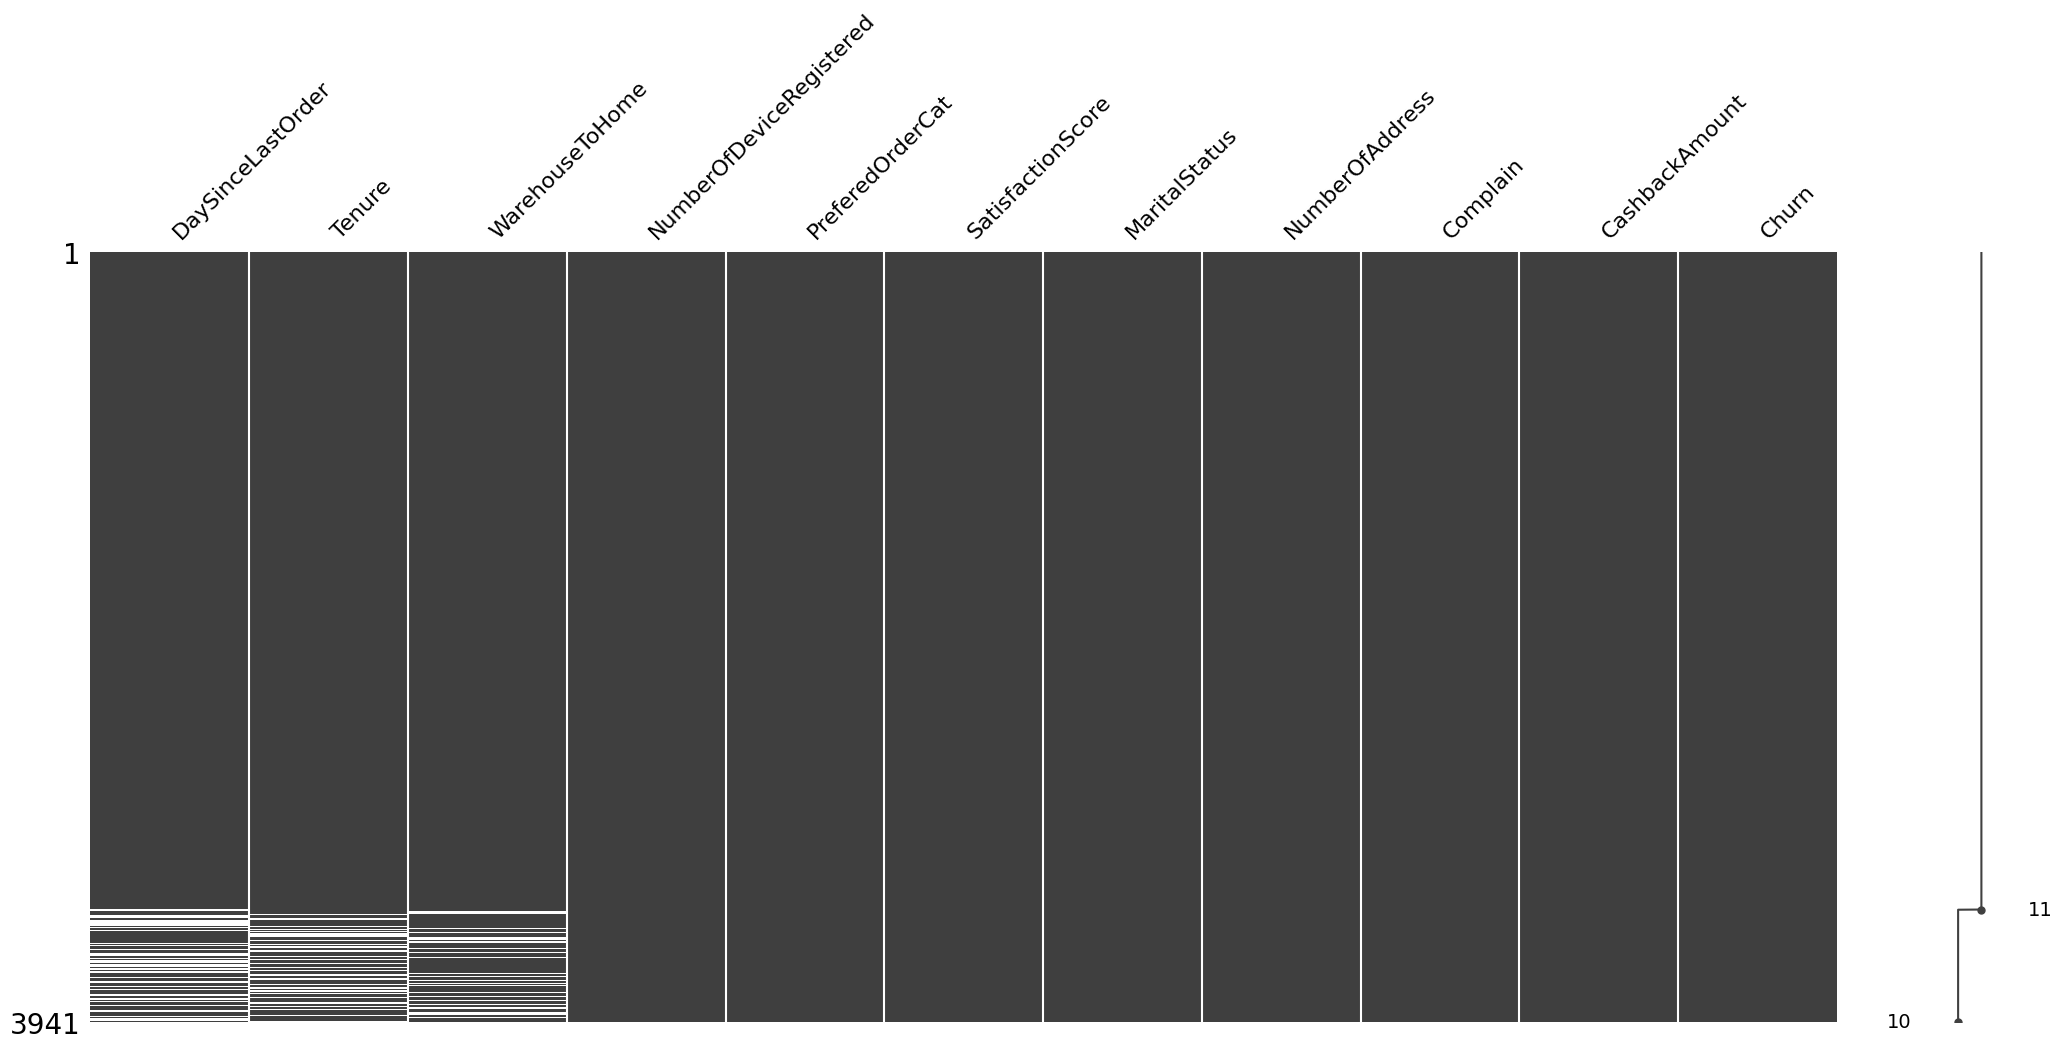

In [19]:
(
    data_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix,sort="descending")
)

## IMPUTACIÓN DE DATOS FALTANTES

In [20]:
data_df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount',
       'Churn'],
      dtype='object')

In [24]:
data_df.DaySinceLastOrder.describe()

,DaySinceLastOrder
count,3728.000000
mean,4.531652
std,3.667648
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,46.000000


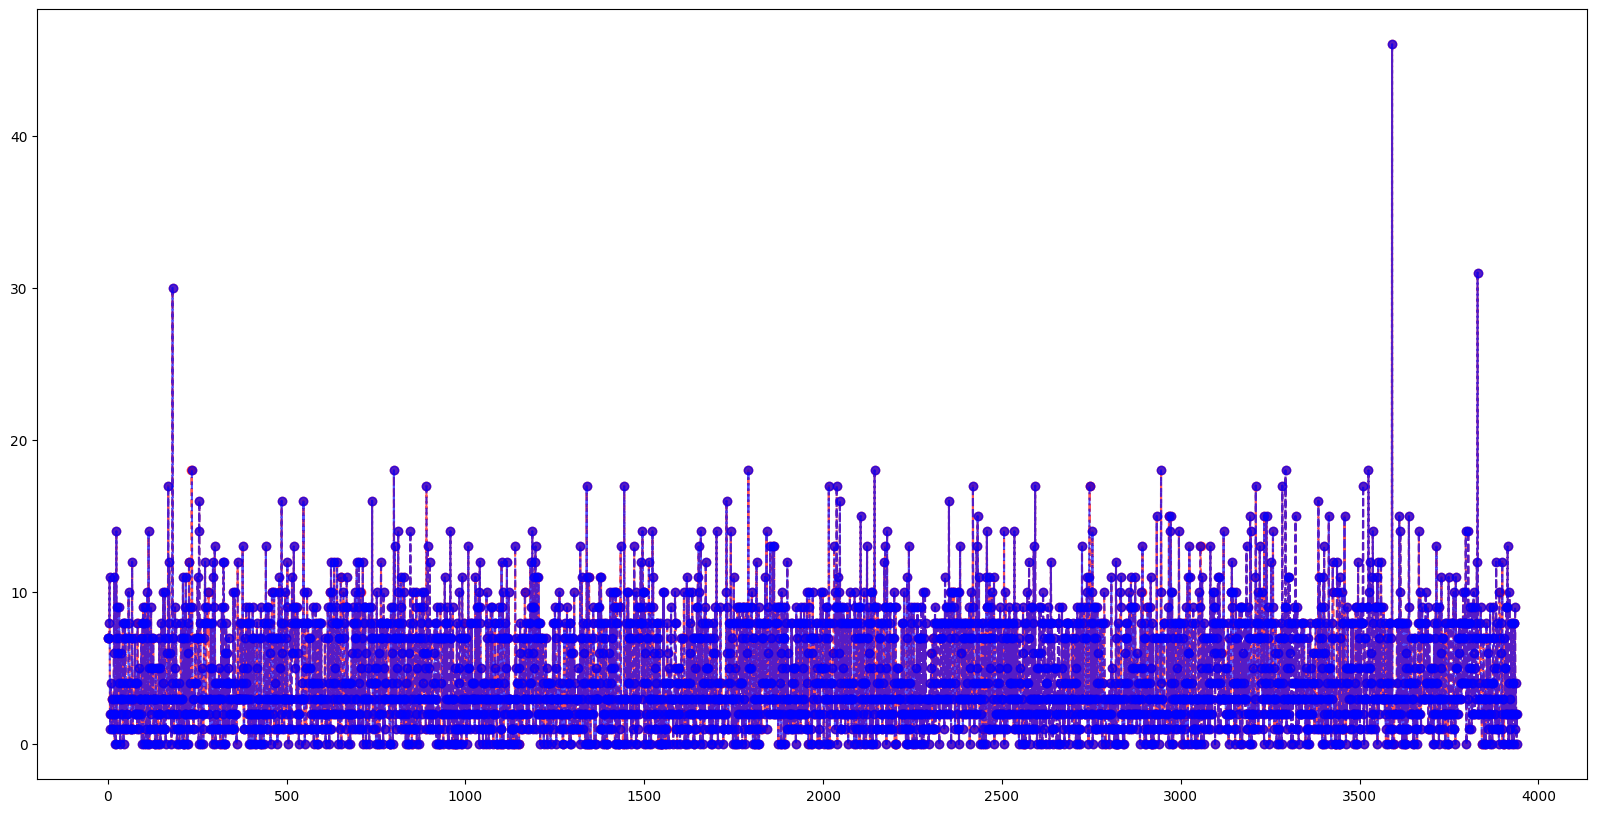

In [40]:
plt.figure(figsize=(20,10))
data_df['DaySinceLastOrder'].interpolate(method='nearest').plot(color='red',marker='o',alpha=6/9,linestyle='dashed')
data_df['DaySinceLastOrder'].plot(color='blue',marker='o',alpha=6/9,linestyle='dashed')
plt.show()


In [42]:
data_daysincelastorder_df = data_df
data_daysincelastorder_df['DaySinceLastOrder'].interpolate(method='nearest',limit_direction='both',inplace=True)
data_daysincelastorder_df['DaySinceLastOrder'].isna().sum()

0

In [38]:
data_df['DaySinceLastOrder'].isna().sum()

213

In [39]:
data_df.DaySinceLastOrder.describe()

,DaySinceLastOrder
count,3728.000000
mean,4.531652
std,3.667648
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,46.000000


In [43]:
data_daysincelastorder_df['DaySinceLastOrder'].describe()

,DaySinceLastOrder
count,3941.000000
mean,4.528546
std,3.661226
min,0.000000
25%,2.000000
50%,3.000000
75%,7.000000
max,46.000000


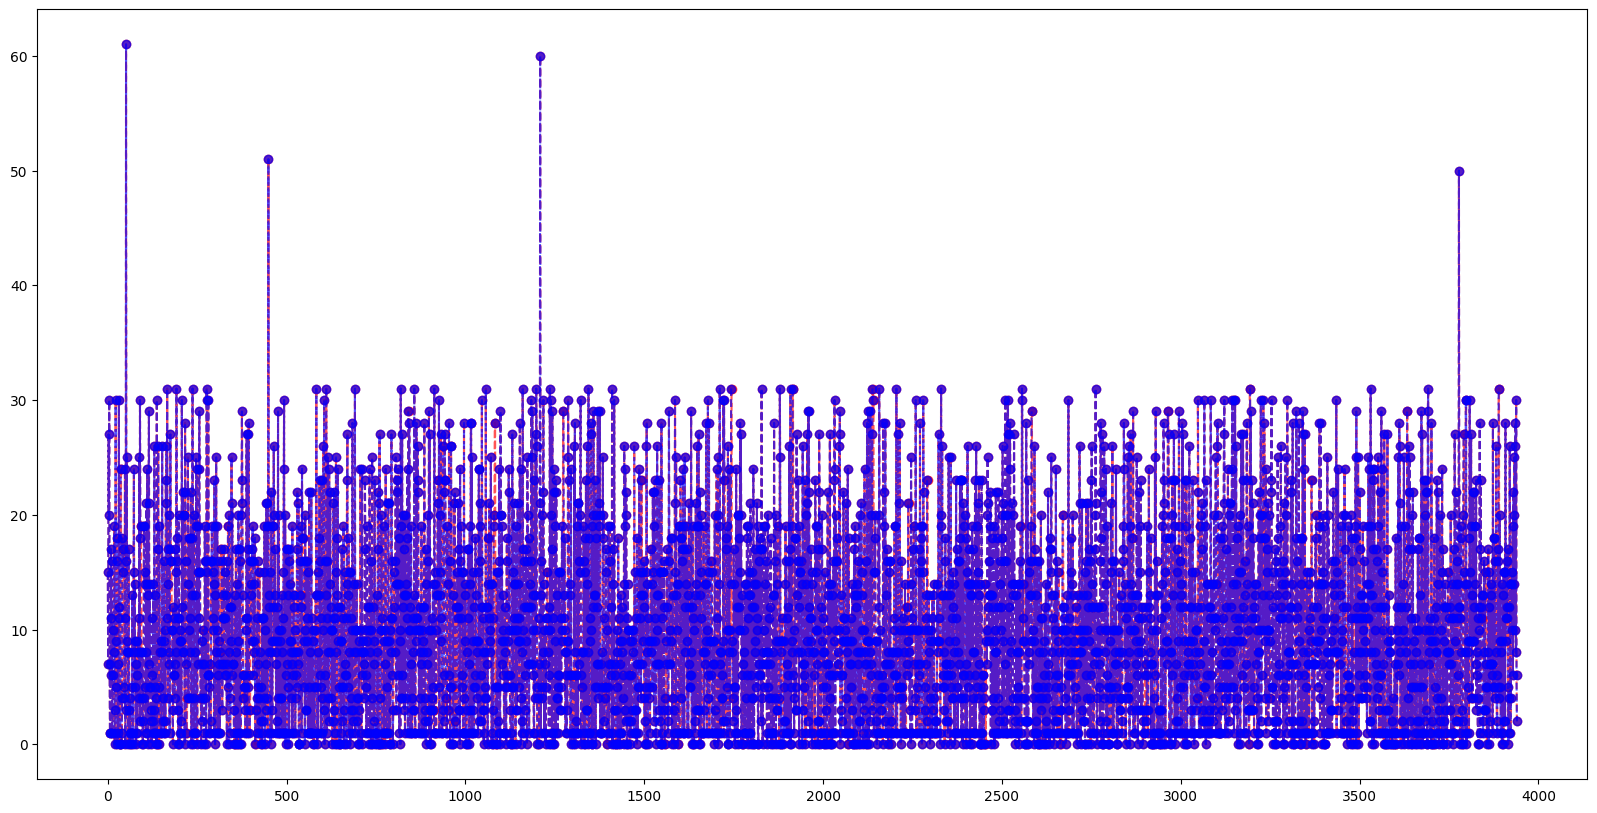

In [44]:
plt.figure(figsize=(20,10))
data_df['Tenure'].interpolate(method='nearest').plot(color='red',marker='o',alpha=6/9,linestyle='dashed')
data_df['Tenure'].plot(color='blue',marker='o',alpha=6/9,linestyle='dashed')
plt.show()

In [45]:
data_df['Tenure'].interpolate(method='nearest',limit_direction='both',inplace=True)
data_df['Tenure'].isna().sum()

0

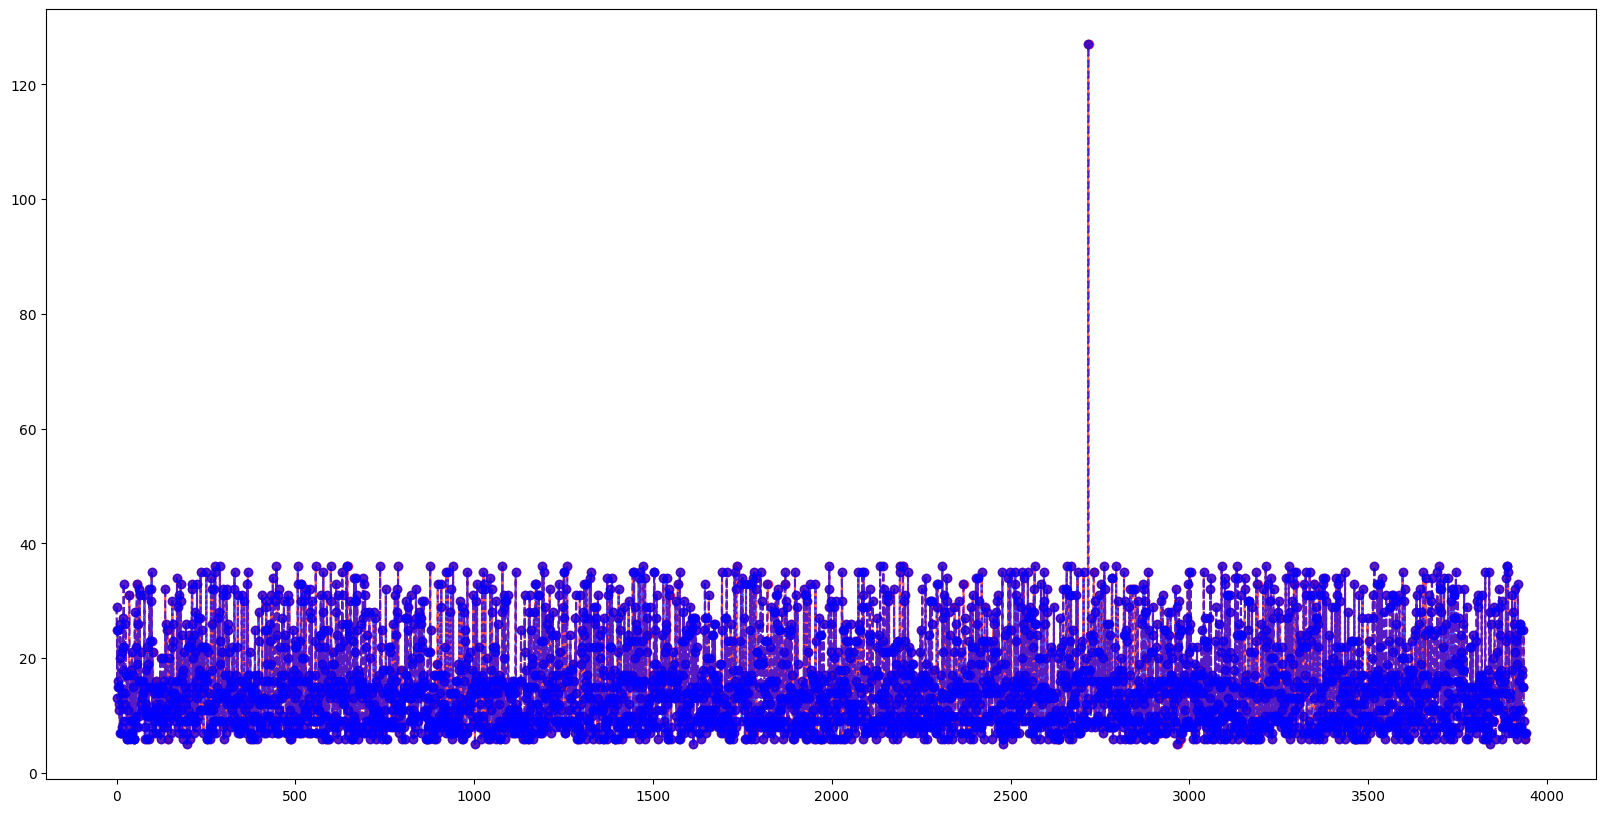

In [46]:
plt.figure(figsize=(20,10))
data_df['WarehouseToHome'].interpolate(method='nearest').plot(color='red',marker='o',alpha=6/9,linestyle='dashed')
data_df['WarehouseToHome'].plot(color='blue',marker='o',alpha=6/9,linestyle='dashed')
plt.show()

In [47]:
data_df['WarehouseToHome'].interpolate(method='nearest',limit_direction='both',inplace=True)
data_df['WarehouseToHome'].isna().sum()

0

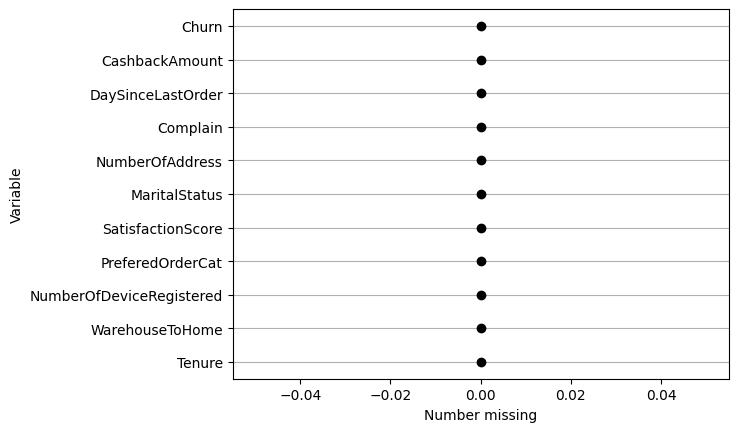

In [48]:
data_df.missing.missing_variable_plot()

# PASO 5 - CODIFICACION DE VARIABLES CATEGORICAS

# LIMPIEZA DE COLUMNAS(VARIABLES)

In [49]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.0/202.0 kB 1.5 MB/s eta 0:00:00


In [50]:
data_df = (
    data_df.clean_names(case_type='snake')
)
data_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tenure,warehouse_to_home,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,day_since_last_order,cashback_amount,churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,7.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,6.0,4,Mobile,3,Married,10,1,0.0,124.37,1


In [51]:
categorical_columns = data_df.select_dtypes(object).columns
categorical_columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['prefered_order_cat', 'marital_status'], dtype='object')

In [55]:
data_df.prefered_order_cat.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
prefered_order_cat,
Laptop & Accessory,1458
Mobile Phone,887
Fashion,585
Mobile,559
Grocery,273
Others,179


In [56]:
data_df.marital_status.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
marital_status,
Married,2055
Single,1310
Divorced,576


## CREO UN TRANSFOMER

In [53]:
import sklearn.compose
import sklearn.preprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
categorical_transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(),categorical_columns),
    remainder="passthrough"
)
categorical_transformer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['prefered_order_cat', 'marital_status'], dtype='object'))])

## APLICO EL TRANSFOMER A MIS VARIABLES CATEGORICAS

In [61]:
data_transformerd_df = (
    pd.DataFrame(
        categorical_transformer.fit_transform(data_df),
        columns = categorical_transformer.get_feature_names_out(),
        index= data_df.index
    )
    .rename_columns(
        function = lambda x: x.removeprefix("ordinalencoder__")
    )
    .rename_columns(
        function = lambda x: x.removeprefix("remainder__")
    )
)
data_transformerd_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,prefered_order_cat,marital_status,tenure,warehouse_to_home,number_of_device_registered,satisfaction_score,number_of_address,complain,day_since_last_order,cashback_amount,churn
0,2.0,2.0,15.0,29.0,4.0,3.0,2.0,0.0,7.0,143.32,0.0
1,3.0,1.0,7.0,25.0,4.0,1.0,2.0,0.0,7.0,129.29,0.0
2,2.0,1.0,27.0,13.0,3.0,1.0,5.0,0.0,7.0,168.54,0.0
3,0.0,0.0,20.0,25.0,4.0,3.0,7.0,0.0,7.0,230.27,0.0
4,5.0,2.0,30.0,15.0,4.0,4.0,8.0,0.0,8.0,322.17,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3936,0.0,1.0,28.0,9.0,5.0,3.0,8.0,0.0,1.0,231.86,0.0
3937,4.0,2.0,8.0,7.0,2.0,2.0,4.0,0.0,4.0,157.80,0.0
3938,2.0,1.0,30.0,6.0,5.0,3.0,3.0,1.0,2.0,156.60,0.0
3939,3.0,1.0,6.0,6.0,4.0,3.0,10.0,1.0,0.0,124.37,1.0
